## Задание 1
Завод производитель подшипников заявляет, что изготовленные на станках металлические элементы для подшипников, имеют средний диаметр 10 мм. Используя односторонний критерий с уровнем значимости α=0,05, проверить эту гипотезу. При проверке гипотезы необходимо учесть, что была произведена выборка из n=16 шариков, где среднее значение диаметра равно 10,3 мм, а дисперсия известна и равна 1 мм.


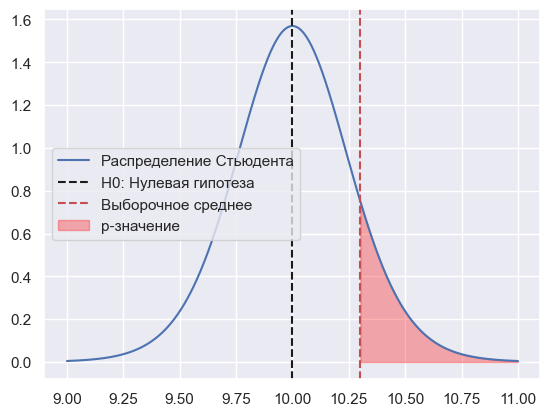

t-статистика: 1.2000000000000028
p-значение: 0.12437489369401078


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Заданные параметры
mean_h0 = 10  # средний диаметр по исходной гипотезе
mean_sample = 10.3  # средний диаметр по выборке
n = 16  # размер выборки
variance = 1  # дисперсия

# Выполняем тест с помощью библиотеки scipy.stats
# Нулевая гипотеза: среднее равно mean_h0
# Альтернативная гипотеза: среднее > mean_h0
t_stat, p_value = (mean_sample - mean_h0) / np.sqrt(variance / n), 1 - stats.t.cdf((mean_sample - mean_h0) / np.sqrt(variance / n), df=n-1)

# Визуализация
x = np.linspace(9, 11, 1000)
y = stats.t.pdf(x, df=n-1, loc=mean_h0, scale=np.sqrt(variance / n))

sns.set()
plt.plot(x, y, label = "Распределение Стьюдента")
plt.axvline(x = mean_h0, color = 'k', linestyle = '--', label = "H0: Нулевая гипотеза")
plt.axvline(x = mean_sample, color='r', linestyle='--', label = "Выборочное среднее")
plt.fill_between(x, y, where=(x>=mean_sample), color="red", alpha=0.3, label="p-значение")
plt.legend()
plt.show()

# Результаты теста и p-значение
print("t-статистика:", t_stat)
print("p-значение:", p_value)

# Задание 2
Производитель конфет заявляет, что средний вес коробки конфет составляет 100 г. Из партии извлечена выборка из n=10 коробок и взвешена. Вес каждой коробки соответствует таблице вариантов. Не противоречит ли это утверждению продавца? Используя уровень значимости α=0,001. Вес коробок конфет распределен нормально. Выборка: 98,104,97,97,101,100,99,101,99,98


Не отвергаем нулевую гипотезу. Z-статистика: -0.8741572761215297, Критическое значение Z: 3.2905267314919255


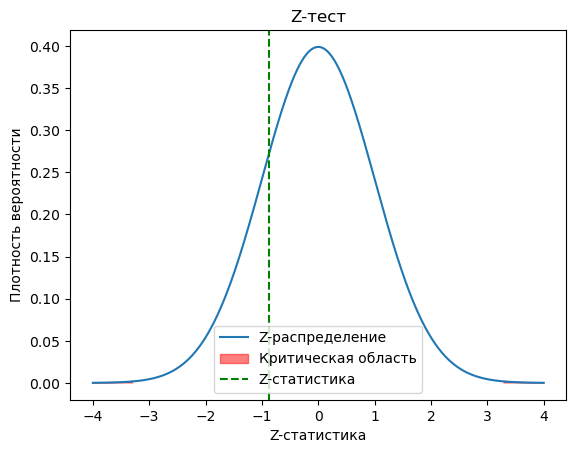

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def z_test(sample, population_mean, alpha):
    sample_mean = np.mean(sample)
    sample_stddev = np.std(sample, ddof=1)
    n = len(sample)

    # Вычисляем Z-статистику
    z_stat = (sample_mean - population_mean) / (sample_stddev / np.sqrt(n))

    # Находим критическое значение Z для двустороннего теста при заданном уровне значимости
    z_critical = norm.ppf(1 - alpha/2)

    # Проверяем гипотезу
    if np.abs(z_stat) > z_critical:
        print(f"Отвергаем нулевую гипотезу. Z-статистика: {z_stat}, Критическое значение Z: {z_critical}")
    else:
        print(f"Не отвергаем нулевую гипотезу. Z-статистика: {z_stat}, Критическое значение Z: {z_critical}")

    # Визуализация
    x = np.linspace(-4, 4, 1000)  # Диапазон для построения графика Z-распределения
    y = norm.pdf(x, 0, 1)  # Плотность вероятности Z-распределения

    plt.plot(x, y, label='Z-распределение')
    plt.fill_between(x, 0, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.5, label='Критическая область')
    plt.axvline(x=z_stat, color='green', linestyle='--', label='Z-статистика')
    plt.title('Z-тест')
    plt.xlabel('Z-статистика')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.show()

    return z_critical  # Возвращаем критическое значение Z

# Данные из задачи
sample = np.array([98, 104, 97, 97, 101, 100, 99, 101, 99, 98])
population_mean = 100
alpha = 0.001

# Выполняем Z-тест и строим график
z_critical_value = z_test(sample, population_mean, alpha)


# Задание 3
Произведены n=7 независимых измерений, в результате которых найдено, что ¯x=82,48 мм, а S=0,08. Предположив, что ошибки измерения имеют нормальное распределение проверить с использованием уровня значимости α=0,05 гипотезу H0:σ2=0,01 мм2. против конкурирующей гипотезы H0:σ2=0,005. В ответе записать разность между фактическим и табличным значениями выборочной характеристики.



Разность между фактическим и табличным значениями выборочной характеристики: -8.751587243743977


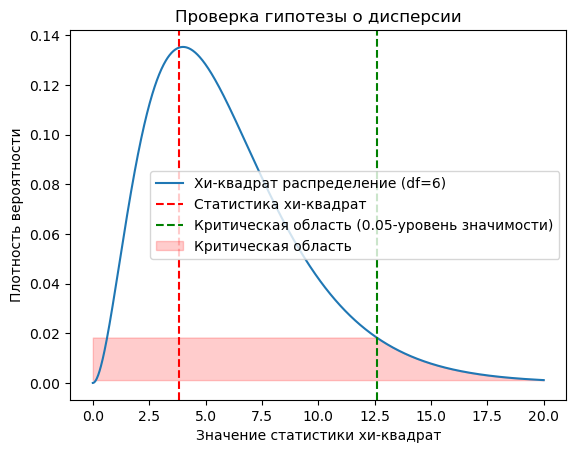

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 7
x_bar = 82.48
S = 0.08
alpha = 0.05
sigma_squared_h0 = 0.01
sigma_squared_h1 = 0.005

# Вычисление статистики хи-квадрат
chi_squared_statistic = (n - 1) * (S ** 2) / sigma_squared_h0

# Определение критической области
chi_squared_critical = stats.chi2.ppf(1 - alpha, df=n - 1)

difference = chi_squared_statistic - chi_squared_critical
print("Разность между фактическим и табличным значениями выборочной характеристики:", difference)

x = np.linspace(0, 20, 1000)
y = stats.chi2.pdf(x, df=n - 1)

plt.plot(x, y, label=f'Хи-квадрат распределение (df={n-1})')
plt.axvline(x=chi_squared_statistic, color='r', linestyle='--', label='Статистика хи-квадрат')
plt.axvline(x=chi_squared_critical, color='g', linestyle='--', label=f'Критическая область ({alpha}-уровень значимости)')

plt.fill_betweenx(y, x, where=(x >= chi_squared_critical), color='red', alpha=0.2, label='Критическая область')

plt.title('Проверка гипотезы о дисперсии')
plt.xlabel('Значение статистики хи-квадрат')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

4) Стратегия финансовой организации «Не обманешь!» не инвестирует в ценные бумаги если дисперсия годовой доходности более чем 0,04. Произведена выборка из n=52 наблюдений по активу А показала, что выборочная дисперсия ее доходности равна 0,045. Узнать, допустимы ли для данной финансовой организации инвестиционные вложения в актив А на уровне значимости: а) 0,05; б) 0,01.

Статистика Хи-квадрат: 57.375
Критическое значение для альфа = 0,05: 68.66929391228578
Критическое значение для альфа = 0,01: 77.38596201613736


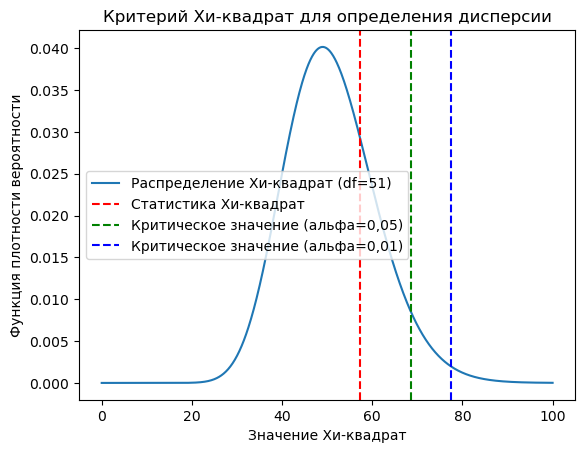

In [50]:
from scipy.stats import chi2

n = 52  # размер выборки
sample_variance = 0.045  # выборочная дисперсия
hypothesized_variance = 0.04  # предполагаемая генеральная дисперсия

# Рассчитываем статистику chi-square
chi_square_statistic = (n - 1) * sample_variance / hypothesized_variance

# Рассчитываем критические значения для уровней значимости 0.05 и 0.01
alpha_005_critical_value = chi2.ppf(0.95, df=n - 1)
alpha_001_critical_value = chi2.ppf(0.99, df=n - 1)

# Печать результатов
print(f"Статистика Хи-квадрат: {chi_square_statistic}")
print(f"Критическое значение для альфа = 0,05: {alpha_005_critical_value}")
print(f"Критическое значение для альфа = 0,01: {alpha_001_critical_value}")

# Визуализация
x = np.linspace(0, 100, 1000)
y = chi2.pdf(x, df=n - 1)

plt.plot(x, y, label=f"Распределение Хи-квадрат (df={n-1})")
plt.axvline(x=chi_square_statistic, color='r', linestyle='--', label="Статистика Хи-квадрат")
plt.axvline(x=alpha_005_critical_value, color='g', linestyle='--', label="Критическое значение (альфа=0,05)")
plt.axvline(x=alpha_001_critical_value, color='b', linestyle='--', label="Критическое значение (альфа=0,01)")

plt.title("Критерий Хи-квадрат для определения дисперсии")
plt.xlabel("Значение Хи-квадрат")
plt.ylabel("Функция плотности вероятности")
plt.legend()
plt.show()


5) Фирма «Спам» рассылает рекламные буклеты возможным заказчикам. Как показал опыт, вероятность того, что организация получившая буклет, закажет рекламируемое изделие, равна 0,08. Фирма разослала 1000 буклетов новой, улучшенной, формы и получила 100 заказов. На уровне значимости 0,05 выяснить, можно ли считать, что новая форма рекламы существенно лучше прежней.

In [52]:
# Данные
orders_new = 100  # количество заказов при новой форме
total_new = 1000  # общее количество буклетов при новой форме
orders_old = 0.08 * 1000  # количество заказов при старой форме (по вероятности)
total_old = 1000  # общее количество буклетов при старой форме

# Вычисление выборочных долей и объединенной выборочной доли
p1 = orders_new / total_new
p2 = orders_old / total_old
p_combined = (orders_new + orders_old) / (total_new + total_old)

# Вычисление статистики Z
z_stat = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1 / total_new + 1 / total_old))

# Определение уровня значимости и критического значения
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)

# Печать результатов
print("Z-статистика:", z_stat)
print("Критическое значение Z:", z_critical)

# Проверка гипотезы
if z_stat > z_critical:
    print("Отвергаем нулевую гипотезу. Новая форма рекламы существенно лучше.")
else:
    print("Не отвергаем нулевую гипотезу. Нет оснований считать, что новая форма лучше.")



Z-статистика: 1.562690769794985
Критическое значение Z: 1.6448536269514722
Не отвергаем нулевую гипотезу. Нет оснований считать, что новая форма лучше.


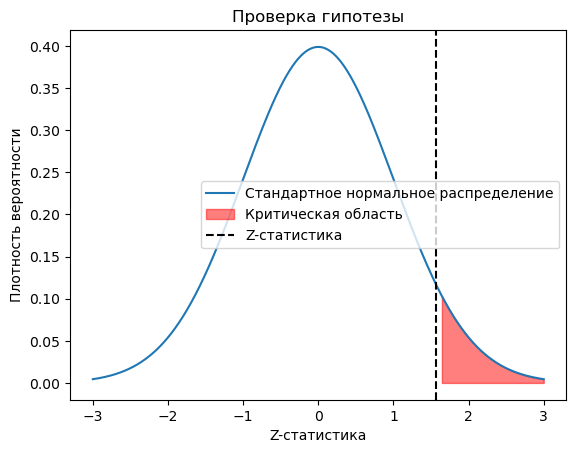

In [53]:
# Визуализация
fig, ax = plt.subplots()

# Строим нормальное распределение для критической области
x = np.linspace(-3, 3, 1000)
ax.plot(x, stats.norm.pdf(x), label='Стандартное нормальное распределение')

# Закрашиваем критическую область (правый хвост)
x_fill = np.linspace(z_critical, 3, 1000)
ax.fill_between(x_fill, stats.norm.pdf(x_fill), color='red', alpha=0.5, label='Критическая область')

# Строим вертикальную линию для Z-статистики
ax.axvline(z_stat, color='black', linestyle='--', label='Z-статистика')

ax.set(title='Проверка гипотезы', xlabel='Z-статистика', ylabel='Плотность вероятности')
ax.legend()
plt.show()


6) Медицинский препарат «Огурчик» снимает похмельный синдром у 80% пациентов. Новый препарат «Огурчик NEW», разработанный для тех же целей, помог 90 пациентам из первых 100 применявших препарат. Можно ли на уровне значимости а = 0,05 считать, что новый препарат лучше? А на уровне а = 0,01?

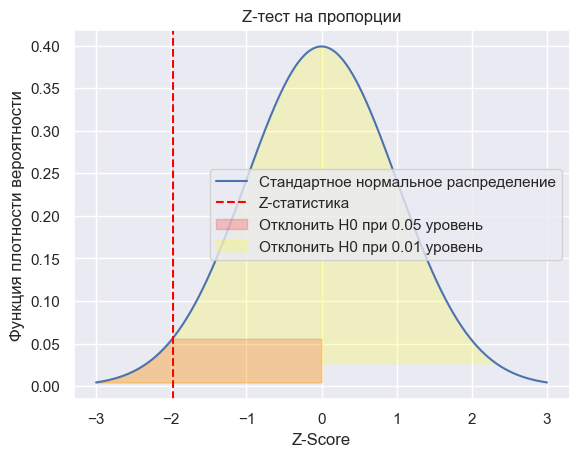

In [4]:
# Данные
p1 = 0.80
p2 = 0.90
n = 100

# Комбинированная пропорция
p_combined = (n * p1 + n * p2) / (2 * n)

# Z-статистика
z = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n + 1/n))

# Уровни значимости
alpha_05 = 0.05
alpha_01 = 0.01

# Критические значения для одностороннего теста
critical_value_05 = stats.norm.ppf(1 - alpha_05)
critical_value_01 = stats.norm.ppf(1 - alpha_01)

# Визуализация
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, label='Стандартное нормальное распределение')
plt.axvline(z, color='red', linestyle='dashed', label='Z-статистика')

plt.fill_betweenx(y, x, where=(x <= z), color='red', alpha=0.2, label=f'Отклонить H0 при {alpha_05} уровень')
plt.fill_betweenx(y, x, where=(x <= critical_value_01), color='yellow', alpha=0.2, label=f'Отклонить H0 при {alpha_01} уровень')

plt.title('Z-тест на пропорции')
plt.xlabel('Z-Score')
plt.ylabel('Функция плотности вероятности')
plt.legend()
plt.show()

# Задание 7
Предполагается, что добавление специальных химических веществ в воду уменьшит ее жесткость. По оценке жесткости воды до и после добавления специальных веществ по 40-ка и 50-ти пробам соответственно получим средние значения жесткости (в стандартных единицах), равные 4,0 и 0,8. Дисперсия измерений в обоих случаях предполагается равно 0,25. Подтверждают ли эти результаты ожидаемый эффект? Принять α=0,05. Контролируемая величина имеет нормальное распределение.

Алгоритм решения:

Отвергаем нулевую гипотезу: существует статистически значимое различие.
t-статистика: -26.6584
P-Значение: 0.0000


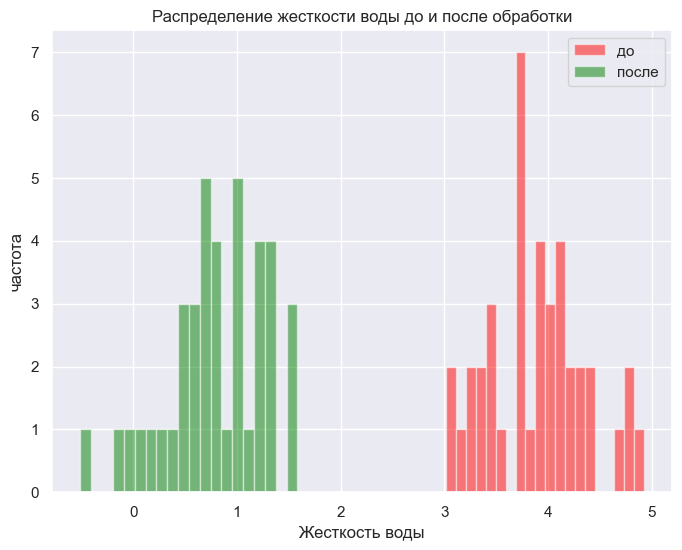

In [5]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

mean_before = 4.0
mean_after = 0.8
variance = 0.25
sample_size = 40  # Общее количество проб до и после
alpha = 0.05

# Генерация данных для до и после
np.random.seed(42)
data_before = np.random.normal(mean_before, np.sqrt(variance), sample_size)
data_after = np.random.normal(mean_after, np.sqrt(variance), sample_size)

# Проведение t-теста
t_statistic, p_value = ttest_rel(data_after, data_before)

# Проверка статистической значимости
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: существует статистически значимое различие.')
else:
    print('Нет достаточных доказательств для отвержения нулевой гипотезы.')
    # Вывод результатов t-теста

print(f't-статистика: {t_statistic:.4f}')
print(f'P-Значение: {p_value:.4f}')

# Визуализация данных
plt.figure(figsize=(8, 6))

# Данные до добавления веществ
plt.hist(data_before, bins=20, alpha=0.5, label='до', color='red')

# Данные после добавления веществ
plt.hist(data_after, bins=20, alpha=0.5, label='после', color='green')

plt.title('Распределение жесткости воды до и после обработки')
plt.xlabel('Жесткость воды')
plt.ylabel('частота')
plt.legend()
plt.show()

# Задание 8
Производительность каждого из перерабатывающих станков А и В составила (в кг вещества за час работы) номера замера (1;2;3;4;5); агрегатор А (14,1 ;13,1;14,7;13,7;14,0); агрегатор B (14,0 ;14,5;13,7;12,7;14,1); Можно ли считать производительность станков А и В одинаковой в предложении, что обе выборки получены из нормально распределенных генеральных совокупностей, при уровне значимости a = 0,1?

Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы в производительности станков А и В.


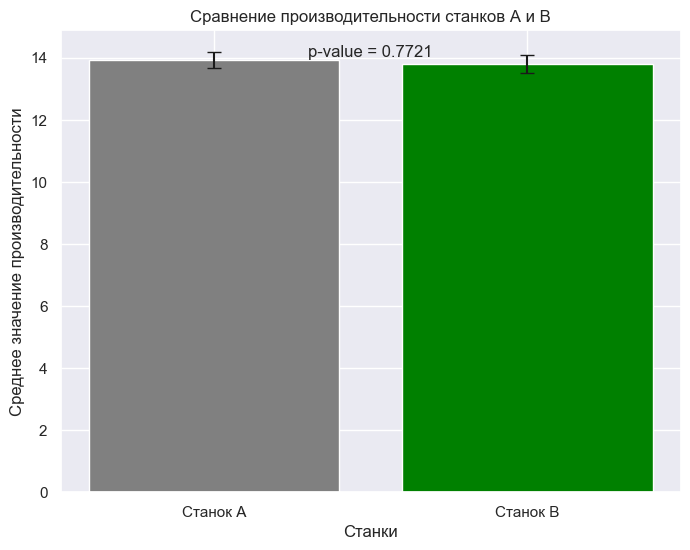

In [6]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

data_A = np.array([14.1, 13.1, 14.7, 13.7, 14.0])
data_B = np.array([14.0, 14.5, 13.7, 12.7, 14.1])

# Уровень значимости
alpha = 0.1

# Выполнение t-теста
t_statistic, p_value = stats.ttest_ind(data_A, data_B)


# Проверка статистической значимости
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: существует статистически значимая разница в производительности станков А и В.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы в производительности станков А и В.')

# Визуализация результатов
plt.figure(figsize=(8, 6))

# Построение графиков
plt.bar([1, 2], [np.mean(data_A), np.mean(data_B)], yerr=[stats.sem(data_A), stats.sem(data_B)], capsize=5, color=['grey', 'green'])
plt.title('Сравнение производительности станков А и В')
plt.xlabel('Станки')
plt.ylabel('Среднее значение производительности')
plt.xticks([1, 2], ['Станок А', 'Станок В'])

# Добавление значений p-value
plt.text(1.5, np.max([np.mean(data_A), np.mean(data_B)]) + 0.1, f'p-value = {p_value:.4f}', ha='center')

# Отображение графика
plt.show()

# Задание 9
Перед наладкой станка была измерена точность изготовления 10 прокладок и найдено значение оценки дисперсии диаметра s21=9,6 мкм2. После наладки подверглись контролю еще 15 прокладок и получено новое значение оценки дисперсии s22=5,7 мкм2. Можно ли считать, что в результате наладки станка точность изготовления деталей увеличилась? Принять α=0,05.


F-критерий: 1.6842105263157894
Критическое значение: 2.6457907352338195


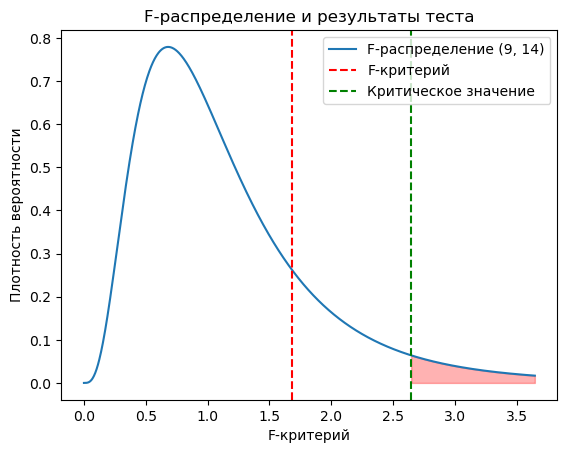

In [35]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

s21 = 9.6  # оценка дисперсии до наладки
s22 = 5.7  # оценка дисперсии после наладки
alpha = 0.05  # уровень значимости

# Размеры выборок
n1 = 10  # перед наладкой
n2 = 15  # после наладки

# Вычисление F-критерия
F = s21 / s22

# Рассчитываем критическое значение F
df1 = n1 - 1
df2 = n2 - 1
critical_value = stats.f.ppf(1 - alpha, df1, df2)

# Печать результатов
print(f"F-критерий: {F}")
print(f"Критическое значение: {critical_value}")

x = np.linspace(0, max(F, critical_value) + 1, 1000)
y = stats.f.pdf(x, df1, df2)

plt.plot(x, y, label=f"F-распределение ({df1}, {df2})")
plt.axvline(x=F, color='r', linestyle='--', label='F-критерий')
plt.axvline(x=critical_value, color='g', linestyle='--', label='Критическое значение')
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3)

plt.title('F-распределение и результаты теста')
plt.xlabel('F-критерий')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Задание 10
При уровне значимости α=0,1 проверить гипотезу о равенстве дисперсий двух нормально распределенных случайных величин Х и Y на основе выборочных данных при альтернативной гипотезе H1:σ2x≠σ2y. x=(xi[51,53,55,56,59],ni=[6,5,4,3,2]) Y=( Yi[15,18,20,23,27] Mi[7,5,4,3,6])

Алгоритм решения:
1) Создаём два массива X и Y по условию
2) Вычисляем дисперсию для двух массивов X и Y с использованием функции np.var библиотеки numpy. Параметр ddof равен 1 и указывает на использование поправки Бесселя для несмещенной оценки дисперсии. Эта поправка учитывает степень свободы, что полезно при оценке дисперсии на основе выборочного набора данных.
3) Расчёт статистики
4) len(X) - 1 вычисляет количество степеней свободы для выборки X, аналогично с Y
5) Функция f.ppf из библиотеки scipy используется для вычисления обратного значения функции распределения F-распределения (квантиля) для заданных степеней свободы и вероятности. Здесь 1 - alpha / 2 используется для получения двустороннего уровня значимости
6) Выводим результат
7) График

Не отвергаем нулевую гипотезу. Дисперсии равны.


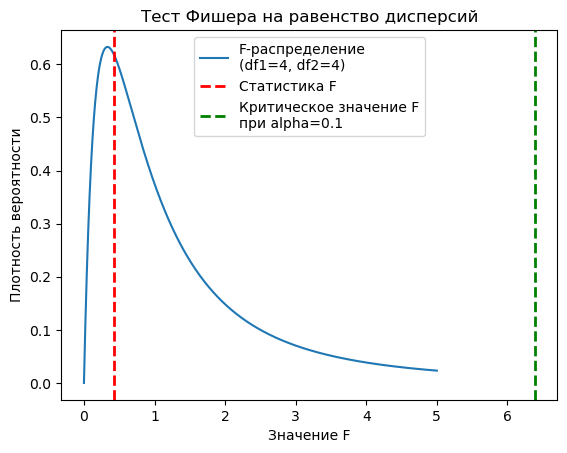

In [32]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt


X = np.array([51, 53, 55, 56, 59])
Y = np.array([15, 18, 20, 23, 27])

# Вычисление выборочных дисперсий
var_x = np.var(X, ddof=1)
var_y = np.var(Y, ddof=1)

# Расчет статистики F
F_statistic = var_x / var_y

# Рассчитываем критическое значение F
alpha = 0.1
df_x = len(X) - 1
df_y = len(Y) - 1
critical_value = f.ppf(1 - alpha / 2, df_x, df_y)


# Вывод результата теста
if F_statistic > critical_value:
    print(f'Отвергаем нулевую гипотезу. Дисперсии не равны.')
else:
    print('Не отвергаем нулевую гипотезу. Дисперсии равны.')

x_range = np.linspace(0, 5, 1000)
y_range = f.pdf(x_range, df_x, df_y)

plt.plot(x_range, y_range, label=f'F-распределение\n(df1={df_x}, df2={df_y})')
plt.axvline(F_statistic, color='red', linestyle='dashed', linewidth=2, label='Статистика F')
plt.axvline(critical_value, color='green', linestyle='dashed', linewidth=2, label=f'Критическое значение F\nпри alpha={alpha}')
plt.title('Тест Фишера на равенство дисперсий')
plt.xlabel('Значение F')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Задание 11
Из 200 задач первого раздела курса «Анализа данных», предложенных для решения в лабораторных работах, студенты решили 130, а из 300 задач второго раздела студенты решили 120. Можно ли при α=0,01 утверждать, что первый раздел курса «Анализа данных» студенты усвоили лучше, чем второй.

Алгоритм решения:
1) Пишем параметры условия задачи
2) se вычисляется по формуле, которая зависит от долей (p1 и p2) и размеров выборок (n1 и n2). После этого к полученному значению применяется функция np.sqrt для вычисления квадратного корня.
3) z рассчитывается как разность долей дефектной продукции (p1 и p2), деленная на стандартную ошибку (se).
4) Используем функцию norm.ppf для нахождения значения, выше которого находится заданный процент значений в стандартном нормальном распределении
5) Выводим результат с помощью функции stats.norm.cdf(z), которая вычисляет кумулятивную функцию распределения для стандартного нормального распределения. Формат вывода результата задается с помощью строки форматирования {1 - stats.norm.cdf(z):.4f}, где :.4f указывает на вывод значения с точностью до 4 знаков после запятой.
6) График

Отвергаем нулевую гипотезу: 0.0000


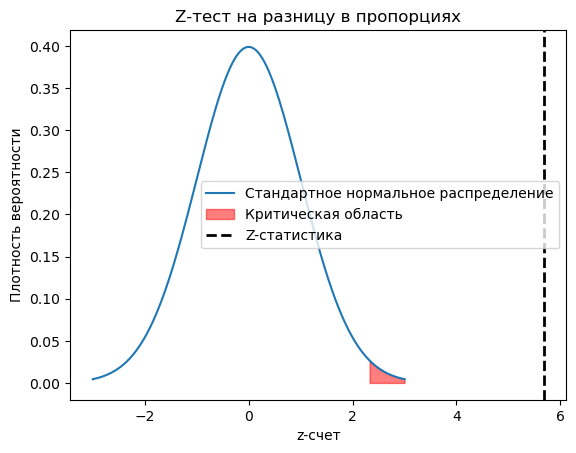

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

n1 = 200  # количество задач в первом разделе
n2 = 300  # количество задач во втором разделе
p1 = 130 / n1  # доля решенных задач в первом разделе
p2 = 120 / n2  # доля решенных задач во втором разделе

# Z-тест для разности долей
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)
z = (p1 - p2) / se

# Уровень значимости
alpha = 0.01

# Критическое значение
z_critical = stats.norm.ppf(1 - alpha)

# Вывод результата
if z > z_critical:
    print(f"Отвергаем нулевую гипотезу: {1 - stats.norm.cdf(z):.4f}")
else:
    print(f"Не отвергаем нулевую гипотезу: {1 - stats.norm.cdf(z):.4f}")
    
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(x, 0, y, where=(x > z_critical), color='red', alpha=0.5, label='Критическая область')
plt.axvline(z, color='black', linestyle='dashed', linewidth=2, label='Z-статистика')

plt.title('Z-тест на разницу в пропорциях')
plt.xlabel('z-счет')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Задание 12
Была проведена выборочная проверка надежности высокотехнологичной продукции 2-х производителей. В результате проверки были получены следующие результаты: в течения месяца после продажи в 15 из 200 технологических продуктов производителя А обнаружены дефекты, тогда как среди 400 продуктов производителя В - 8% оказались дефектами. Существенны ли различия в надежности продукции производителей А и В? Уровень значимости принять равным 0,01.

Алгоритм решения:
1) В начале кода определены две функции:

1. z_test_proportions(p1, p2, n1, n2):
   Аргументы функции:
     - p1 и p2 - доли дефектной продукции в первой и второй генеральной совокупностях соответственно,
     - n1 и n2 - размеры выборок из первой и второй генеральных совокупностей соответственно.
   - Функция рассчитывает общую долю дефектной продукции p и стандартную ошибку se, а затем вычисляет Z-статистику как разность долей дефектной продукции в двух генеральных совокупностях, деленную на стандартную ошибку.
   - Результатом функции является значение Z-статистики.
   
2. two_proportion_z_test(z_stat, alpha):
   - Аргументы функции:
     - z_stat - значение Z-статистики,
     - alpha - уровень значимости.
   - Функция рассчитывает p-значение, используя значение Z-статистики. Затем сравнивает p-значение с уровнем значимости и определяет, отвергается ли нулевая гипотеза.
   - Результатом функции является логическое значение - True, если нулевая гипотеза отвергается, и False, если нулевая гипотеза не отвергается.

2) Далее в коде определены следующие переменные:
    - defects_A и defects_B - доли дефектной продукции для двух производителей А и В 
    
3) Затем вызывается функция two_proportion_z_test, которой передаются значение Z-статистики и уровень значимости. Результат ее выполнения сохраняется в переменную result
4) В конце кода осуществляется вывод результата теста на экран в виде сообщения, которое зависит от значения переменной result

In [3]:
from scipy.stats import norm
import numpy as np

def z_test_proportions(p1, p2, n1, n2):
    p = (p1 * n1 + p2 * n2) / (n1 + n2)
    se = p * (1 - p) * (1 / n1 + 1 / n2)
    se = np.sqrt(se)
    z = (p1 - p2) / se
    return z

def two_proportion_z_test(z_stat, alpha):
    p = norm.cdf(-z_stat) * 2
    return p < alpha

# Рассчитываем долю дефектной продукции для каждого производителя
defects_A = 15 / 200
defects_B = 8 / 400

# Вычисляем z-статистику
z_stat = z_test_proportions(defects_A, defects_B, 200, 400)

# Проводим двухвыборочный z-тест
alpha = 0.01
result = two_proportion_z_test(z_stat, alpha)

# Печатаем результат
if result:
    print("Различия в надежности продукции производителей А и В существенны")
else:
    print("Различия в надежности продукции производителей А и В несущественны")

Различия в надежности продукции производителей А и В существенны
